### Gene ontology analysis figure 
This code creates the replicated figure 2 from Liang & Sun (2018). 
It loads a dataset taken from DAVID after:


* Analyzing the integrated DEGs from the 4 datasets
* Submitting the gene list to DAVID
* selecting level 5 for BP,CC and MF
* Setting the cutoff at 0.049 and the minimum gene count of 5 

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import cm
import math
from matplotlib.colors import Normalize

In [93]:
#dataset = pd.read_csv('https://raw.githubusercontent.com/marcelaradilla/capstone/main/5count5levelDAVID_out1.csv?token=AK7IZID7CHO5RPLPEOXXAGS72J3EU')
#https://raw.githubusercontent.com/marcelaradilla/capstone/main/5count5levelDAVID_out1.csv?token=AK7IZIHUHSTGH5L6ZJDWKU272JZ6C

#dataset1=pd.read_csv('/content/drive/MyDrive/FALL 2020 BACKUP /capstone/GO analysis/5count5levelDAVID_out1.csv')

dataset1=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Replication/GO analysis/final_chart.csv')

In [150]:
p_vals=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Replication/GO analysis/final_chart-pvalues - Sheet1.csv')
p_vals

,PValue,P-value1
0,9.431900e-10,9.431890e-10
1,5.701621e-07,5.701621e-07
2,3.444846e-06,3.444846e-06
3,6.118355e-06,6.118355e-06
4,8.931539e-06,8.931539e-06
...,...,...
267,4.692420e-02,4.692420e-02
268,4.751227e-02,4.751227e-02
269,4.809470e-02,4.809470e-02
270,4.816554e-02,4.816554e-02


In [94]:
dataset1

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,GOTERM_CC_5,GO:0070062~extracellular exosome,73,33.486239,9.431900e-10,"213071_AT, 202458_AT, 211719_X_AT, 203180_AT, ...",200,2811,15514,2.014447,2.697523e-07,2.697523e-07,2.527749e-07
1,GOTERM_CC_5,GO:0044459~plasma membrane part,63,28.899083,5.701621e-07,"211719_X_AT, 212110_AT, 213693_S_AT, 206765_AT...",200,2635,15514,1.854615,1.630531e-04,8.153318e-05,7.640173e-05
2,GOTERM_BP_5,GO:0048513~animal organ development,70,32.110092,3.444846e-06,"221900_AT, 203180_AT, 207980_S_AT, 202436_S_AT...",213,3129,16130,1.694132,8.312139e-03,7.409328e-03,7.201304e-03
3,GOTERM_BP_5,GO:0009887~organ morphogenesis,32,14.678899,6.118355e-06,"221900_AT, 203180_AT, 209292_AT, 211343_S_AT, ...",213,992,16130,2.442829,1.471547e-02,7.409328e-03,7.201304e-03
4,GOTERM_CC_5,GO:0098590~plasma membrane region,30,13.761468,8.931539e-06,"211719_X_AT, 211343_S_AT, 213693_S_AT, 202920_...",200,936,15514,2.486218,2.551172e-03,8.514734e-04,7.978842e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,GOTERM_BP_5,GO:0001823~mesonephros development,5,2.293578,4.692420e-02,"203638_S_AT, 202071_AT, 207144_S_AT, 203685_AT...",213,103,16130,3.676102,1.000000e+00,5.213321e-01,5.066952e-01
268,GOTERM_BP_5,GO:0090596~sensory organ morphogenesis,8,3.669725,4.751227e-02,"201843_S_AT, 221900_AT, 203180_AT, 211596_S_AT...",213,250,16130,2.423286,1.000000e+00,5.254553e-01,5.107026e-01
269,GOTERM_BP_5,GO:0060395~SMAD protein signal transduction,4,1.834862,4.809470e-02,"220204_S_AT, 207144_S_AT, 221577_X_AT, 209737_...",213,62,16130,4.885658,1.000000e+00,5.278594e-01,5.130393e-01
270,GOTERM_BP_5,GO:2000021~regulation of ion homeostasis,7,3.211009,4.816554e-02,"216944_S_AT, 204606_AT, 205485_AT, 214505_S_AT...",213,199,16130,2.663788,1.000000e+00,5.278594e-01,5.130393e-01


In [95]:
dataset_copy=dataset1

In [96]:
len(dataset1)

272

In [97]:
for row in range(228): 
  dataset1['GOterm']=dataset1['Term'].str.slice(stop=10)

In [98]:
data_d=dataset1.drop(labels=['Genes','List Total','Pop Hits','Pop Total','Bonferroni',	'Benjamini',	'FDR','Fold Enrichment'	],axis='columns')
data_d[0:50]

,Category,Term,Count,%,PValue,GOterm
0,GOTERM_CC_5,GO:0070062~extracellular exosome,73,33.486239,9.431900e-10,GO:0070062
1,GOTERM_CC_5,GO:0044459~plasma membrane part,63,28.899083,5.701621e-07,GO:0044459
2,GOTERM_BP_5,GO:0048513~animal organ development,70,32.110092,3.444846e-06,GO:0048513
3,GOTERM_BP_5,GO:0009887~organ morphogenesis,32,14.678899,6.118355e-06,GO:0009887
4,GOTERM_CC_5,GO:0098590~plasma membrane region,30,13.761468,8.931539e-06,GO:0098590
5,GOTERM_BP_5,GO:0016477~cell migration,34,15.596330,3.150184e-05,GO:0016477
6,GOTERM_BP_5,GO:0009966~regulation of signal transduction,60,27.522936,4.359296e-05,GO:0009966
7,GOTERM_CC_5,GO:0060205~cytoplasmic membrane-bounded vesicl...,9,4.128440,6.130087e-05,GO:0060205
8,GOTERM_BP_5,GO:0048468~cell development,47,21.559633,6.390357e-05,GO:0048468
9,GOTERM_BP_5,GO:0001501~skeletal system development,19,8.715596,8.645039e-05,GO:0001501


In [99]:
#data_d[50:100]

In [100]:
#data_d[100:150]

In [101]:
#data_d[150:200]

In [102]:
#data_d[200:250]

In [103]:
#data_d[250:272]

In [104]:
#after selecting the GO terms 
newdataframe=data_d.iloc[[0,3,5,6,11,16,20,26,32,38,50,60,68,75,87,
98,108,130,163,167,185,189,227,228,232,237,239,247,266,269,]]
newdataframe

,Category,Term,Count,%,PValue,GOterm
0,GOTERM_CC_5,GO:0070062~extracellular exosome,73,33.486239,9.431900e-10,GO:0070062
3,GOTERM_BP_5,GO:0009887~organ morphogenesis,32,14.678899,6.118355e-06,GO:0009887
5,GOTERM_BP_5,GO:0016477~cell migration,34,15.596330,3.150184e-05,GO:0016477
6,GOTERM_BP_5,GO:0009966~regulation of signal transduction,60,27.522936,4.359296e-05,GO:0009966
11,GOTERM_CC_5,GO:0016324~apical plasma membrane,14,6.422018,1.071069e-04,GO:0016324
16,GOTERM_BP_5,GO:0030318~melanocyte differentiation,5,2.293578,2.507378e-04,GO:0030318
20,GOTERM_BP_5,GO:0072358~cardiovascular system development,27,12.385321,2.887303e-04,GO:0072358
26,GOTERM_BP_5,GO:0034754~cellular hormone metabolic process,8,3.669725,5.268493e-04,GO:0034754
32,GOTERM_BP_5,GO:0097190~apoptotic signaling pathway,19,8.715596,7.071692e-04,GO:0097190
38,GOTERM_BP_5,GO:0006590~thyroid hormone generation,4,1.834862,9.063499e-04,GO:0006590


In [126]:
terms=np.asarray(newdataframe['Term'])
terms

array(['GO:0070062~extracellular exosome',
       'GO:0009887~organ morphogenesis', 'GO:0016477~cell migration',
       'GO:0009966~regulation of signal transduction',
       'GO:0016324~apical plasma membrane',
       'GO:0030318~melanocyte differentiation',
       'GO:0072358~cardiovascular system development',
       'GO:0034754~cellular hormone metabolic process',
       'GO:0097190~apoptotic signaling pathway',
       'GO:0006590~thyroid hormone generation',
       'GO:0042403~thyroid hormone metabolic process',
       'GO:0006811~ion transport',
       'GO:0030111~regulation of Wnt signaling pathway',
       'GO:0043549~regulation of kinase activity',
       'GO:0016323~basolateral plasma membrane',
       'GO:0070741~response to interleukin-6',
       'GO:0004252~serine-type endopeptidase activity',
       'GO:0003281~ventricular septum development',
       'GO:0001105~RNA polymerase II transcription coactivator activity',
       'GO:0030199~collagen fibril organization',
      

In [127]:
counts=np.asarray(newdataframe['Count'])
len(counts)

30

In [175]:
p_values=p_vals.iloc[[0,3,5,6,11,16,20,26,32,38,50,60,68,75,87,
98,108,130,163,167,185,189,227,228,232,237,239,247,266,269,]]
p_values=np.asarray(p_values['PValue'])
#p_values=p_values.drop(labels=['P-value1'],axis='columns')
#p_values=np.asarray(p_values)
p_values=-np.log10(p_values)

In [176]:
p_values

array([9.02540082, 5.21336533, 4.50166407, 4.36058363, 3.97018272,
       3.60078026, 3.53950765, 3.27831362, 3.15047668, 3.04270412,
       2.7312177 , 2.56364065, 2.50181807, 2.42505692, 2.31311394,
       2.19664934, 2.11100374, 2.0250362 , 1.84112716, 1.81040746,
       1.69148756, 1.66133184, 1.50230078, 1.5008232 , 1.48387111,
       1.47093012, 1.45557785, 1.44016908, 1.34249675, 1.3179028 ])

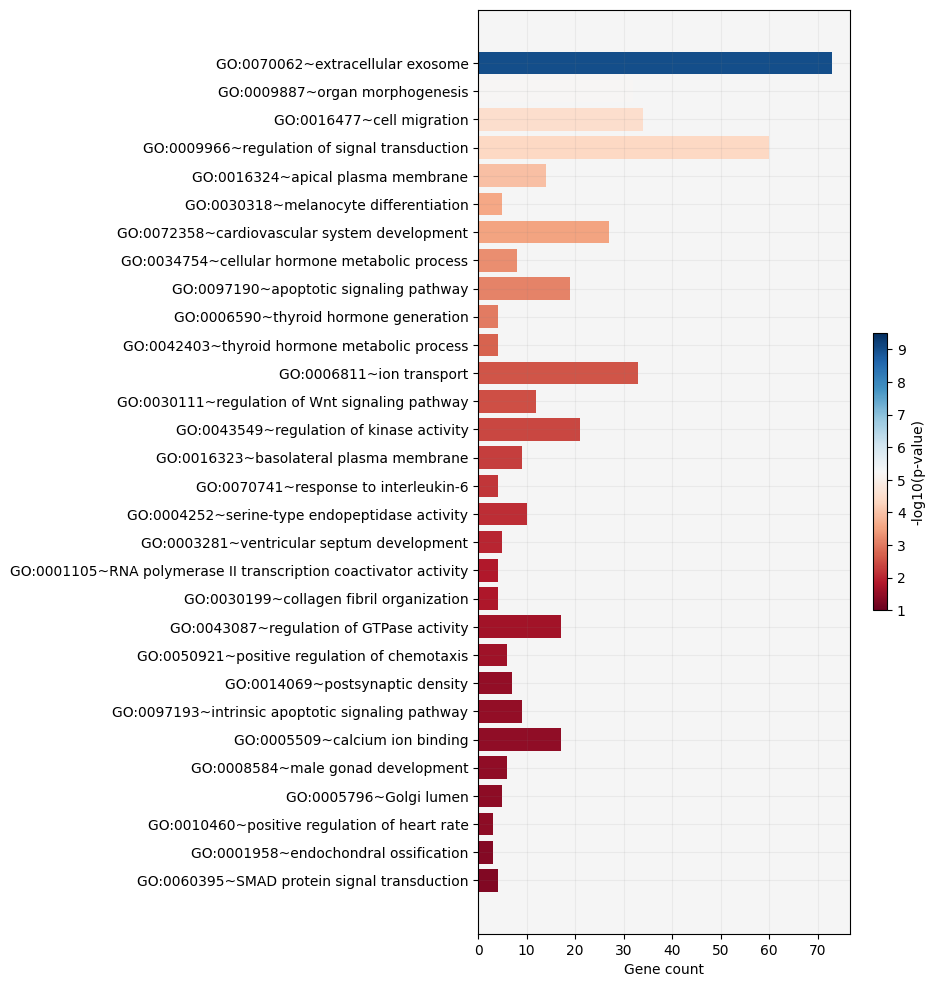

In [225]:
fig,ax=plt.subplots(figsize=(6,12))
#using normalize function was inspired from https://www.pythonprogramming.in/vary-the-color-of-each-bar-in-bar-chart-using-particular-value-in-matplotlib.html
my_cmap = cm.get_cmap('RdBu')
my_norm = Normalize(vmin=1, vmax=9.5)

ploti=ax.barh(terms,counts,color=my_cmap(my_norm(p_values)))
#ax.barh()
ax.set_yticklabels(terms)
#axis inversion was inspired from https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html
ax.invert_yaxis()
ax.set_xlabel('Gene count')
fig.colorbar(cm.ScalarMappable(norm=my_norm, cmap=my_cmap), ax=ax,shrink=0.3,label='-log10(p-value)')
plt.grid(alpha=0.1,color='gray')
ax.set_facecolor('whitesmoke')
#plt.savefig('figure2_marcela.png')
#files.download('figure2_marcela.png')
plt.show()